# A. Get the Data

## A.1 Collect Data

Please refer to the directory `./data` for how specfic price & volume and fundamental data is collected and integrated into a dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_parquet('data/data.parquet.gzip')
data = data.reset_index()

In [2]:
data

,index,level_0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,...,equityGrowth,Book To Market,Cash To Price,Dividend To Price,Earning To Price,30 Day Momentum,180 Day Momentum,360 Day Momentum,1080 Day Momentum,return
0,0,0,1962-01-02,0.000000,0.771045,0.748367,0.754036,212800.0,0.0,0.0,...,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.007518
1,1,1,1962-01-03,0.000000,0.759705,0.741280,0.759705,422400.0,0.0,0.0,...,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2,1962-01-04,0.000000,0.772462,0.759705,0.759705,212800.0,0.0,0.0,...,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.026119
3,3,3,1962-01-05,0.000000,0.756871,0.737027,0.739862,315200.0,0.0,0.0,...,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.005747
4,4,4,1962-01-08,0.000000,0.741280,0.731358,0.735610,334400.0,0.0,0.0,...,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085145,4085145,4085645,2022-10-06,153.789993,154.949997,152.240005,152.589996,1324100.0,0.0,0.0,...,0.0,22.668283,1.735369e+07,0.0,1.344780e+07,-10.040009,-47.272629,-19.856491,68.937531,-0.034209
4085146,4085146,4085646,2022-10-07,151.080002,151.410004,146.949997,147.369995,2022200.0,0.0,0.0,...,0.0,15.368529,1.796838e+07,0.0,1.392414e+07,-18.160004,-53.867706,-25.165802,64.809265,-0.010789
4085147,4085147,4085647,2022-10-10,148.100006,148.100006,144.440002,145.779999,1569000.0,0.0,0.0,...,0.0,20.023712,1.816436e+07,0.0,1.407601e+07,-14.110001,-53.833527,-20.464081,63.891823,0.003224
4085148,4085148,4085648,2022-10-11,145.770004,148.490005,144.600006,146.250000,1583400.0,0.0,0.0,...,0.0,19.777845,1.810598e+07,0.0,1.403077e+07,-11.619995,-53.104462,-23.993378,64.995415,-0.002667


Below I provide a useful tool for searching for a specific feature or its similar ones in this dataset.

In [3]:
def search(target, data):
    for col in data.columns:
        if target in col:
            print(col)
    pass
search('Growth', data)

assetGrowth
inventoryGrowth
taxGrowth
commonStockGrowth
longTermDebtGrowth
depreciationGrowth
equityGrowth


## A.2 Define A Performance Metric

In a classical regression problem set, we want to set the loss function to calculate the mean squared error between the predicted label and the true label. Similar to what may happen in imbalanced dataset, we want to give different weights to different samples considering their different impacts on predictions and errors.

In [4]:
ERROR = 'mean_squared_error'

def performance_measure(y_true, y_pred):
    m_ = eval(ERROR)
    print('weighted_{}: {:.5f}'.format(
        ERROR, m_(y_true, y_pred, sample_weight=abs(y_true) / np.sum(abs(y_true)))
    )
         )
    return m_(y_true, y_pred, sample_weight=abs(y_true) / np.sum(abs(y_true)))

# Exploratory Data Analysis

First let's have a look at the description of the specific features.
* Originally we have 154 features,
* We in fact have 152 numeric features

In [5]:
data.describe()

,index,level_0,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close,...,equityGrowth,Book To Market,Cash To Price,Dividend To Price,Earning To Price,30 Day Momentum,180 Day Momentum,360 Day Momentum,1080 Day Momentum,return
count,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4085150.0,...,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06,4.085150e+06
mean,2.042574e+06,2.043071e+06,4.164390e+01,4.224948e+01,4.123966e+01,4.175610e+01,5.274205e+06,3.174411e-03,7.212186e-04,0.0,...,3.982203e-02,5.897094e+02,8.947389e+07,2.275293e-04,1.980503e+08,5.953525e-04,7.576087e-03,1.628828e-02,3.696599e-02,6.430662e-04
std,1.179281e+06,1.179288e+06,1.129289e+02,1.143207e+02,1.114448e+02,1.129044e+02,2.894299e+07,9.107402e-02,4.234801e-02,0.0,...,3.448642e+00,6.973144e+04,5.374578e+08,9.505204e-03,7.447152e+08,2.155694e+01,5.419941e+01,7.917699e+01,1.194651e+02,2.861193e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.825141e-03,1.825142e-03,1.858732e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,-1.847443e+02,-3.808786e+04,-6.299665e+06,0.000000e+00,-5.025265e+09,-4.309163e+03,-5.482046e+03,-5.932994e+03,-5.914932e+03,-9.999685e-01
25%,1.021287e+06,1.021787e+06,3.992176e+00,4.176273e+00,4.060826e+00,4.120987e+00,4.416000e+05,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.288161e+06,-3.971393e-01,-3.412255e-01,-2.031525e-01,-6.023997e-02,-9.174335e-03
50%,2.042574e+06,2.043074e+06,1.636877e+01,1.662280e+01,1.614946e+01,1.639143e+01,1.336606e+06,0.000000e+00,0.000000e+00,0.0,...,0.000000e+00,3.973591e+01,6.982412e+06,0.000000e+00,4.458886e+07,7.639742e-02,5.357304e-01,1.140559e+00,3.065739e+00,0.000000e+00
75%,3.063862e+06,3.064362e+06,4.278674e+01,4.328414e+01,4.228006e+01,4.279350e+01,3.585079e+06,0.000000e+00,0.000000e+00,0.0,...,3.803728e-02,1.173868e+02,3.560543e+07,0.000000e+00,1.513421e+08,1.241981e+00,4.279492e+00,7.379884e+00,1.577361e+01,1.020197e-02
max,4.085149e+06,4.085649e+06,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,7.421641e+09,1.037500e+02,2.000000e+01,0.0,...,8.050528e+02,5.856073e+07,3.436785e+10,1.111525e+01,3.853354e+10,1.095460e+03,1.863930e+03,3.010640e+03,3.539030e+03,2.633333e+01


We can easily figure out the following features as dummy features that were previously used to assist in creating new features but are not useful here any more, thus needs to be dropped:
* `level_0`
* `index`
* `Adj Close`

In [6]:
data = data.drop(["level_0", "index", "Adj Close"], axis=1)

## Correlation

We then compute the following two series to have a look at correlations among features:
* `corr_between_features`: the pairwise correlation between each pair of combination of features
* `corr_with_return`: the correlation between each feature with return

In [7]:
corr_between_features = data.corr()
corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'return']].corrwith(data['return']), columns=['corr'])
corr_with_return['index'] = range(corr_with_return.shape[0])

We first plot the matrix of `corr_between_features`. One can easily make an observation that we have multiple blank stripes crossing inside the matrix image. We can then realize that such blank stripes may be attributed to some sort of abnormal distributions of data. Indeed, if we pick one example, say the 45th feature, we will see correlations between every other features with this 45th feature is `nan`, which means missing data. We can further dive into such feature and then easily observe that this is because the 45th feature is a time series consisting of solely 0. Using the similar logic, we pick up all features correspondent to such blank stripes and drop them. The features that are going to be dropped because they don't contain any data are:
* `accumulatedAmortization`
* `negativeGoodwill`
* `effectOfAccountingCharges`
* `otherItems`
* `Accural`

<AxesSubplot:>

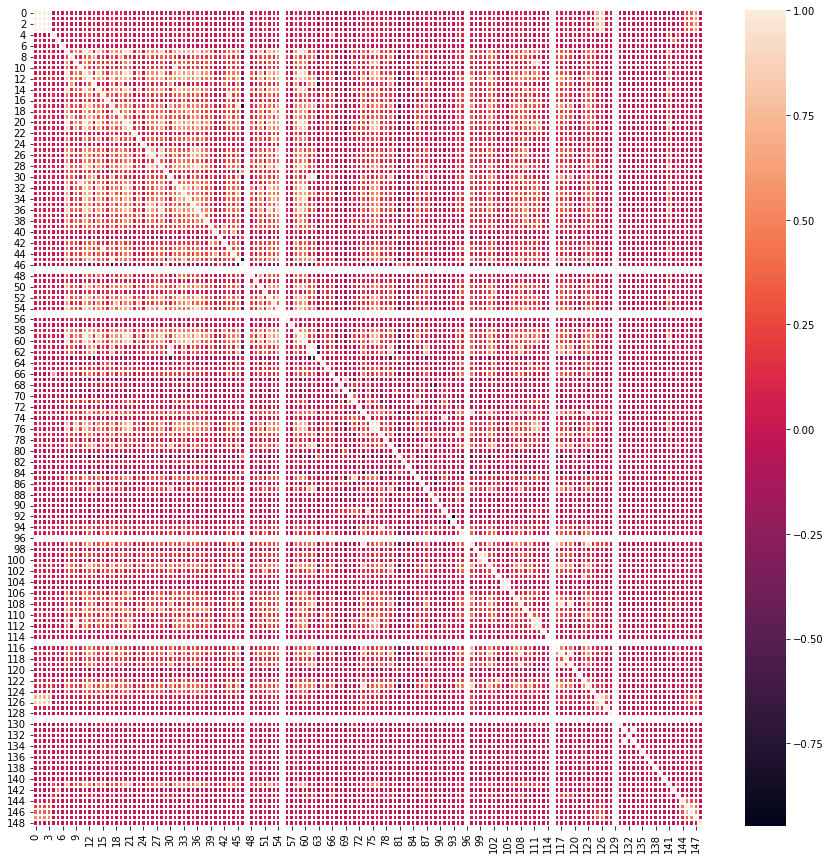

In [8]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(15,15))

features = corr_between_features.columns
sns.heatmap(corr_between_features.values, linewidths=2, annot=False, ax=ax)

After dropping the useless features we can get a clearer correlation matrix. We can make the following observation with respect to correlations between pairs of features:
* The first 5 features are highly correlated
* No obvious clusters of highly correlated features, only some pairs of features show relatively high correlations among the first 50 features

<AxesSubplot:>

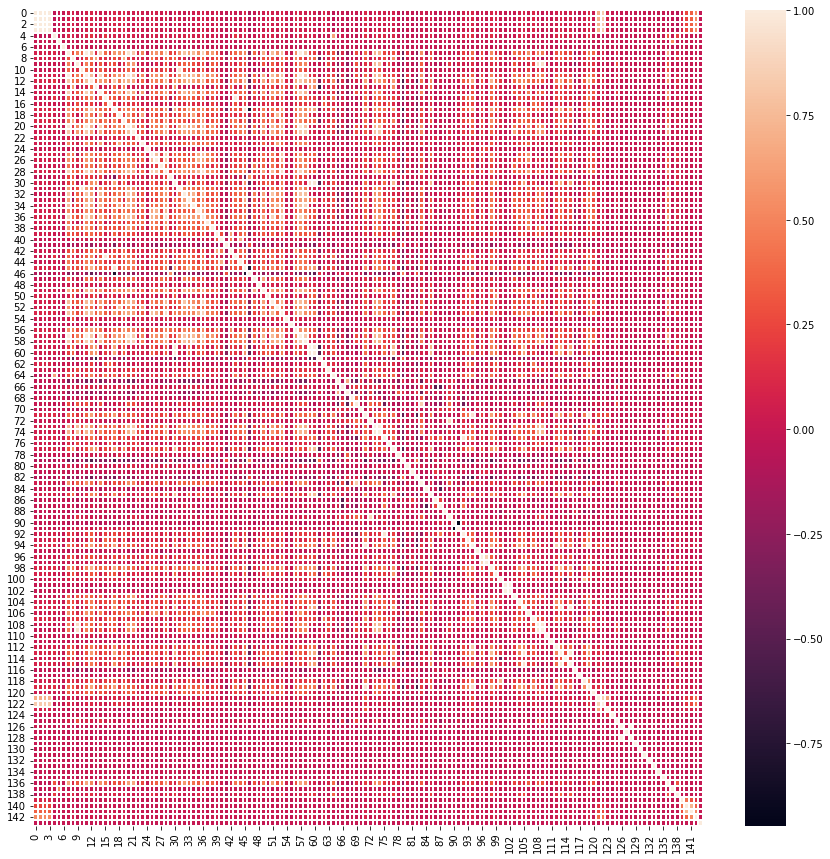

In [9]:
t = corr_between_features.isna().sum()
data = data.drop(t[t > 5].index, axis = 1)

corr_between_features = data.corr()
corr_with_return = pd.DataFrame(data[[i for i in data.columns if i != 'return']].corrwith(data['return']), columns=['corr'])
corr_with_return['index'] = range(corr_with_return.shape[0])

fig, ax = plt.subplots(figsize=(15,15))

features = corr_between_features.columns
sns.heatmap(corr_between_features.values, linewidths=2, annot=False, ax=ax)

We further examine the distribution of absolute values of all correlation numbers and plot them into histgram accordingly. We can conclude that most of correlations lie in the range between -0.25 and 0.75, only a very small portion is observed to have very extreme correlatioin.

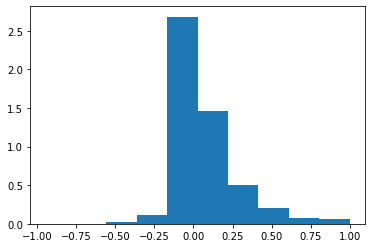

In [10]:
_ = plt.hist(corr_between_features.values.flatten(), density=True)

We also want to study the pattern of all features' correlation with stock price return, thus plot them into a scatter chart. We make the following observations:
* The correlation between single feature with return is not very significant, ranging from -0.008 to 0.004, which is ery close to 0.
* Based on such premise, we can still identify several features which have relatively high correlation, we pick up all those features whose correlation with return is either higher than 0.002 or lower than -0.007 and present them below for potential use

<AxesSubplot:xlabel='index', ylabel='corr'>

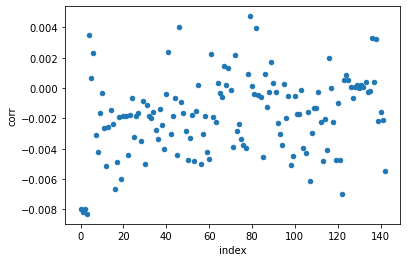

In [11]:
corr_with_return.plot(kind='scatter', x='index', y='corr')

In [12]:
corr_with_return[(corr_with_return['corr'] > 0.002) | (corr_with_return['corr'] < -0.007)]

,corr,index
Open,-0.007995,0
High,-0.008165,1
Low,-0.008000,2
Close,-0.008304,3
Volume,0.003515,4
Stock Splits,0.002336,6
accumulatedOtherComprehensiveIncome,0.002384,41
treasuryStock,0.004009,46
accumulatedDepreciation,0.002248,61
changeInCash,0.002163,72


**Conclusion:** In this part, we explore the correlation among features and between features and return. 
* We identify useless features through visualization of correlation matrix and drop them accordingly
* We believe the correlation among most features is in a resonable range, yet some of them is relatively extreme. For deep learning, we don't need to worry about this too much; but for classical machine learning models, we should use dimension reduction techniques to handle high correlations before feeding data into models
* The correlation between each single feature with return is all low and close to 0, however we still manage to identify some feature with relatively high correlation with return for potential use in classical machine learning models


## Technical Signals

This dataset builds its features following a literature review over prevail documentations on which financial and market data should be included in the dataset to help predict future stock returns. One great group is different kinds of technical signals that are utilized by different investment strategies. We hereby study whether these technical signals can contribute to the prediction of stock returns.

In [13]:
import statsmodels.api as sm

x = data['30 Day Momentum'].values
y = data['return'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.26
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.14e-05
Time:                        14:13:41   Log-Likelihood:             8.7218e+06
No. Observations:             4085150   AIC:                        -1.744e+07
Df Residuals:                 4085148   BIC:                        -1.744e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   1.42e-05     45.427      0.0

In [14]:
x = data['Book To Market'].values
y = data['return'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1566
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.692
Time:                        14:13:43   Log-Likelihood:             8.7218e+06
No. Observations:             4085150   AIC:                        -1.744e+07
Df Residuals:                 4085148   BIC:                        -1.744e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   1.42e-05     45.429      0.0

In [15]:
x = data['assetGrowth'].values
y = data['return'].values


x2 =sm.add_constant(x)
est = sm.OLS(y,x2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03422
Date:                Sat, 29 Oct 2022   Prob (F-statistic):              0.853
Time:                        14:13:44   Log-Likelihood:             8.7218e+06
No. Observations:             4085150   AIC:                        -1.744e+07
Df Residuals:                 4085148   BIC:                        -1.744e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   1.42e-05     45.426      0.0